Sentiment Analysis

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

# Load IMDb dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)  # Limit to top 10,000 words

# Pad the sequences to make them all the same length
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data, maxlen=500)
test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data, maxlen=500)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


2.2 Dataset
We will use the IMDb movie reviews dataset, which contains 25,000 reviews with labels positive or negative.

In [2]:
model = tf.keras.Sequential([
    layers.Embedding(10000, 128, input_length=500),
    layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


C:\ProgramData\Anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [3]:
# Train the model
history = model.fit(train_data, train_labels, epochs=5, batch_size=64, validation_data=(test_data, test_labels))


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 263s 649ms/step - accuracy: 0.7159 - loss: 0.5435 - val_accuracy: 0.7864 - val_loss: 0.4675
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 237s 607ms/step - accuracy: 0.8596 - loss: 0.3481 - val_accuracy: 0.8571 - val_loss: 0.3600
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 218s 557ms/step - accuracy: 0.8698 - loss: 0.3167 - val_accuracy: 0.8578 - val_loss: 0.3560
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 211s 538ms/step - accuracy: 0.8977 - loss: 0.2648 - val_accuracy: 0.8387 - val_loss: 0.3855
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 207s 528ms/step - accuracy: 0.9061 - loss: 0.2388 - val_accuracy: 0.8503 - val_loss: 0.3830


In [4]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


782/782 - 39s - 50ms/step - accuracy: 0.8503 - loss: 0.3830
Test accuracy: 0.8503199815750122


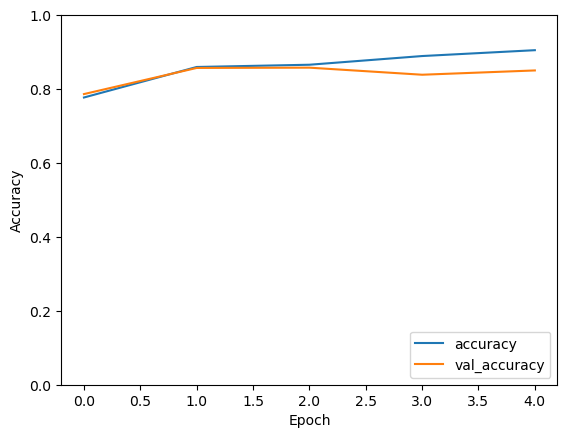

In [5]:
# Plot training and validation accuracy/loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
